# 2024 Winter Introduction to Deep Learning
### Based on Prof. Oh's Youtube Lecture
https://youtube.com/playlist?list=PLvbUC2Zh5oJvByu9KL82bswYT2IKf0K1M

> Assignment #2


*   Youtube Lecture #4-8
*   Written by Seungeun Lee

### Notice for Python
##### If you are new to Python, please follow the Youtube link below:
##### https://youtube.com/playlist?list=PLGPF8gvWLYyrkF85itdBHaOLSVbtdzBww
##### You really don't have to understand everything in this video!! Just get a feel for Python:)
##### If you have any trouble installing Python3, just use online python compiler -- I recommend https://www.programiz.com/python-programming/online-compiler/

## 1. Gradient Descent





##### Reference. https://teddylee777.github.io/scikit-learn/gradient-descent/

In [22]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
## Quick Question

## What is numpy and matplotlib?
## Google it and write the answer

## Your Answer
## 넘파이는 백터. 행렬 등 선형대수 라이브러리
## matplotlib은 그래프를 그리는 라이브러리

In [24]:
# Let's make a linear function
def make_linear(w=0.5, b=0.8, size=50, noise=1.0): ## This is a 'function' name 'make_linear' - we're going to use this function later on
    x = np.random.rand(size) # random x
    y = w * x + b # y=wx+b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape) # random noise
    yy = y + noise # adding random noise to y
    plt.figure(figsize=(10, 7)) # plotting the figure - figure size
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}') # plot x in x-axis, y in y-axis, and label -- line plot
    plt.scatter(x, yy, label='data') ## plot x in x-axis, yy (y+noise) in y-axis -- scatter plot
    plt.legend(fontsize=20) ## setting legend's fontsize
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy ## The function make_linear will return the value x and yy in the end


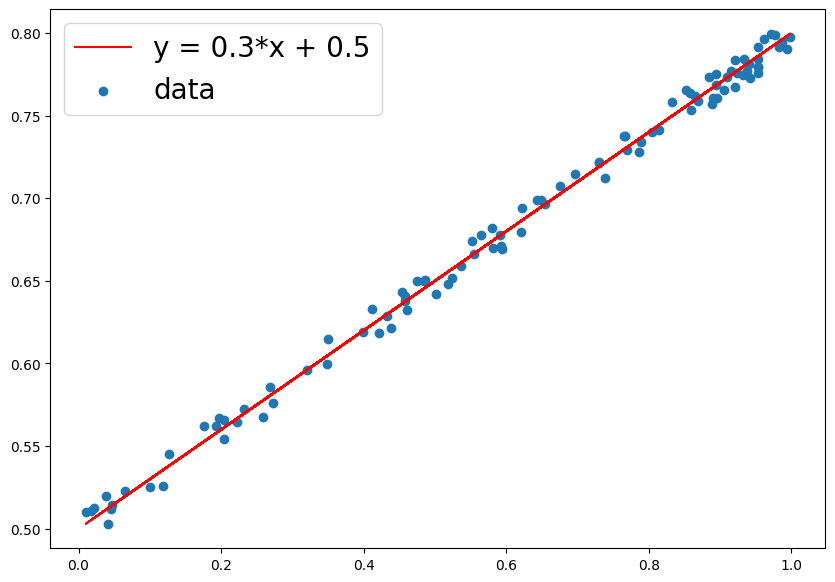

w: 0.3, b: 0.5


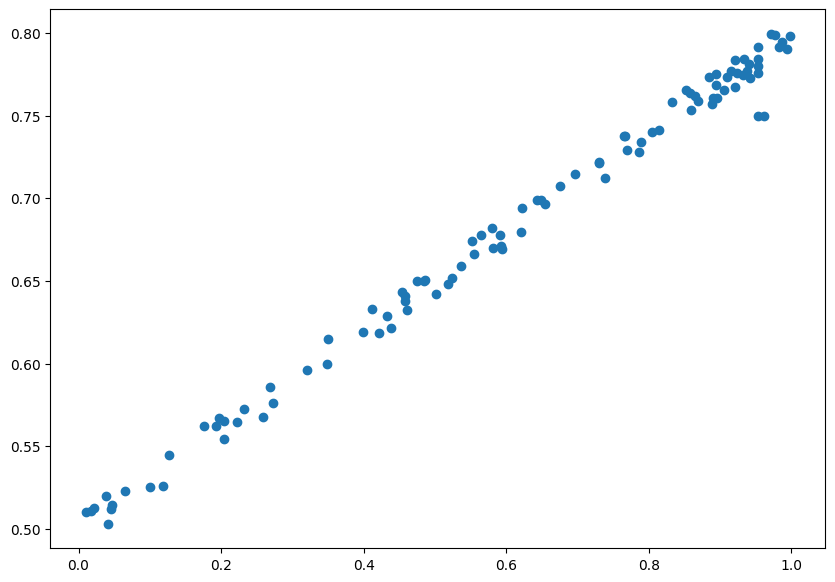

In [25]:
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01) ## Here we use the function make_linear -> first figure: line + scatter plot

## Intentionally making 1 outlier
y[5] = 0.75
y[10] = 0.75

plt.figure(figsize=(10, 7))
plt.scatter(x, y) ## second figure: only scatter plot
plt.show()

In [26]:
## randomly choose w and b
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

In [27]:
## y_hat: prediction
y_hat = w * x + b

## Loss function
error = (y_hat - y) ** 2

In [28]:
## Quick Question
## (1) Write a name of the loss function above. HInt: _ _ _ Loss

## (2) Is it okay to use 'error = (y_hat-y)' or 'error = np.abs(y_hat-y)'?
## Write your own answer and justify your choice.

## Your Answer
## (1)
##Mean Squared Error(MSE) Loss
## (2)
##error = (y_hat-y)는 오차의 방향을 알려고 할 때 사용한다


In [29]:
# Epoch (# of iterations)
num_epoch = 5000

# Learning rate
learning_rate = 0.5

In [30]:
## Quick Question
## (1) What is epoch? Google it and write your own answer in detail.
## (2) What is learning rate? Google in and write your own answer.

## Your Answer
## (1)
## epoch은 전체 데이터셋 모두 진행하였을 때의 횟수다 데이터셋의 모든 샘플을 사용하여 가중치를 업데이트한다 너무 많은 epoch를 하면 학습 데이터에 과적합이 될 수 있다
## (2)
## learning rate는 가중치를 업데이트하는 비율을 결정하는 것. 하이퍼 파라미터 이기에 사용자가 직접 입력해주어야한다

In [31]:
## Question 1
errors = [] #초기화
# w, b: random initialization -- result may vary each time you execute the code
w = np.random.uniform(low=-1.0, high=1.0) # 초기화
b = np.random.uniform(low=-1.0, high=1.0) # 초기화

for epoch in range(num_epoch): #epoch 수 만큼 반복문 실행
    y_hat = x * w + b # 입력 데이터 x에 대한 예측 값을 계산

    error = ((y_hat - y)**2).mean() # 예측 값과 실제 값 간의 쳥균 제곱 오차를 계산
    if error < 0.0005:
        break #에러가 0.005보다 작으면 학습 중단

    w = w - learning_rate * ((y_hat - y) * x).mean() # 가중 치 w를 예측 값과 실제 값 차이에 대한 기울기를 사용하여 업데이트
    b = b - learning_rate * (y_hat - y).mean() # bias b를 예측 값과 실제 값 차이에 대한 기울기를 사용하여 업데이트

    errors.append(error) # 에러 값을 리스트에 저장

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))#매 5 에포크마다 현재 에포크, 가중치, 바이어스, 에러 값을 출력

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))# 출력

 0 w = -0.40979, b = 0.79518 error = 0.32527
 5 w = -0.23744, b = 0.84702 error = 0.02857
10 w = -0.15470, b = 0.79382 error = 0.02041
15 w = -0.08496, b = 0.74863 error = 0.01458
20 w = -0.02604, b = 0.71045 error = 0.01043
25 w = 0.02373, b = 0.67819 error = 0.00746
30 w = 0.06578, b = 0.65094 error = 0.00534
35 w = 0.10131, b = 0.62792 error = 0.00383
40 w = 0.13132, b = 0.60847 error = 0.00275
45 w = 0.15667, b = 0.59204 error = 0.00198
50 w = 0.17809, b = 0.57816 error = 0.00143
55 w = 0.19619, b = 0.56643 error = 0.00104
60 w = 0.21147, b = 0.55653 error = 0.00076
65 w = 0.22439, b = 0.54816 error = 0.00056
------------------------------------------------------------
67 w = 0.2, b = 0.5 error = 0.00050


### Question 1. Please write a line-by-line explanation of the code above.


*   Use '#' for Python!
*   ChatGPT allowed :) -- but please try to understand the code

## 2. Let's practice numpy

In [21]:
import numpy as np ## np: abbreviation of numpy (convention)

In [32]:
arr = np.array([1,2,3]) # numpy array
print(arr)

[1 2 3]


In [33]:
arr2 = np.array([[1,2,3], [4,5,6]]) # numpy array
print(arr2)

[[1 2 3]
 [4 5 6]]


In [34]:
arr3 = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(arr3)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### Quick Question (Optional)
##### https://datascienceschool.net/01%20python/03.01%20%EB%84%98%ED%8C%8C%EC%9D%B4%20%EB%B0%B0%EC%97%B4.html
##### Read and summarize the document above.

In [35]:
## Let's check their data type
## numpy.ndarray (n*d array)
print(type(arr))
print(type(arr2))
print(type(arr3))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
## .shape returns the shape of the numpy array
print(arr.shape) # (3, ) -> because it's 1d array (vector)
print(arr2.shape) # matrix
print(arr3.shape) # matrix

(3,)
(2, 3)
(3, 3)


In [36]:
## How to make numpy array more conveniently?
print(np.ones((2,3))) ## ONES!!
print(2*np.ones((2,3))) ## TWOS!!

[[1. 1. 1.]
 [1. 1. 1.]]
[[2. 2. 2.]
 [2. 2. 2.]]


In [37]:
print(np.zeros((2,3))) ## ZEROS!!
## Of course...
print(0*np.ones((2,3))) ## ZEROS!!

[[0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]]


In [38]:
## Reshaping numpy array
arr12 = np.ones((3,4))
arr12.reshape(1, 12)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [40]:
## But what if we do not know (or do not want to know; it's lazy... but anyway) the exact size of numpy array?
## Use -1

arr12.reshape(-1, 12) ## same result!

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [42]:
## It's quite obvious but...
arr12.reshape(-1, 5) ## this does not work

ValueError: cannot reshape array of size 12 into shape (5)

In [43]:
## Sorting the values
arr_mixed = np.array([1,5,2,3])
print(np.sort(arr_mixed))

[1 2 3 5]


### Question 2. Sorting with numpy
##### (1) We've just sorted the vector in increasing order. Can you sort the same vector in decreasing order?
##### (2) Read the document for np.argsort (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html). Explain the numpy argsort function and execute the code with arr_mixed.

In [44]:
## Indexing
arr4 = np.array([5,2,3,4,6])
print(arr4[1]) ## index starts with 0

2


In [45]:
## Slicing
arr4[1:3] ## Including 1st entry, excluding 3rd entry

array([2, 3])

In [46]:
## Quick Question
## Write a code that slices arr4 from 1st entry to 4th entry. HInt: including 1st entry, excluding 5th entry

## Your Answer
arr4[1:5]


array([2, 3, 4, 6])

## 3. Let's practice matplotlib

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
# this command let us view the figure in the jupyter notebook directly

[1, 2, 3]


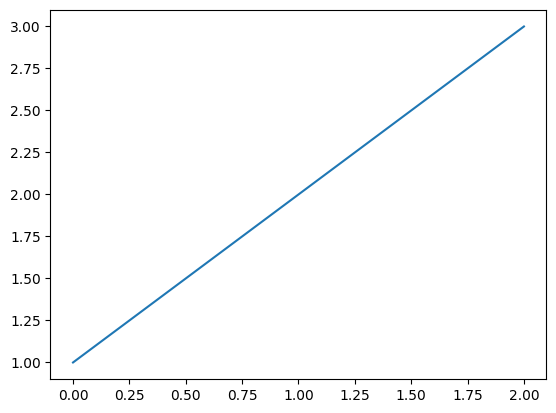

In [48]:
x = [1, 2 , 3]
print(x) # list with 1, 2, and 3
plt.plot(x) # matplotlib regard this as y-axis: 1, 2, 3 (the value given) -> corresponding x-axis: 0, 1, 2 (starting from 0, having 3 elements)

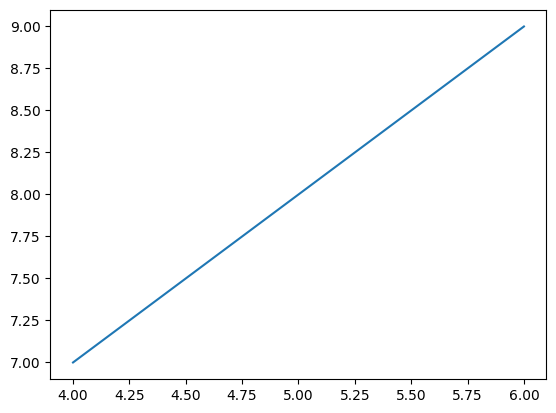

In [49]:
## But what if we specify the elements of x-axis?
x = [4, 5, 6]
y = [7, 8, 9]
plt.plot(x, y)

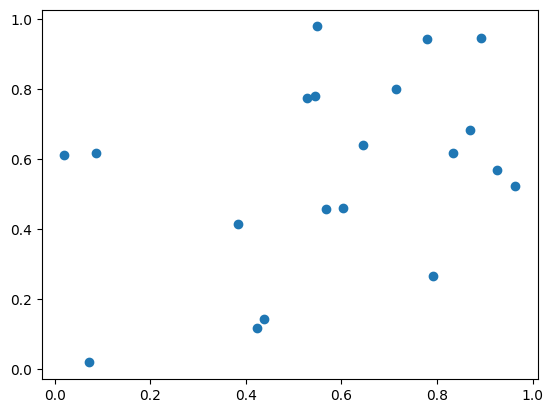

In [50]:
# We can also draw a scatter plot
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n = 20
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y)
plt.show()

<ipython-input-51-0468370304b4>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, alpha=0.5, cmap='Spectral') ## alpha? cmap?


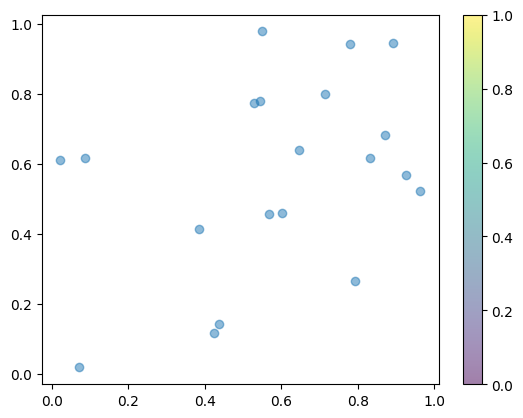

In [51]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n = 20
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y, alpha=0.5, cmap='Spectral') ## alpha? cmap?
plt.colorbar()
plt.show()

<ipython-input-52-1ac764af888c>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, alpha=0.1, cmap='Spectral') ## alpha? cmap?


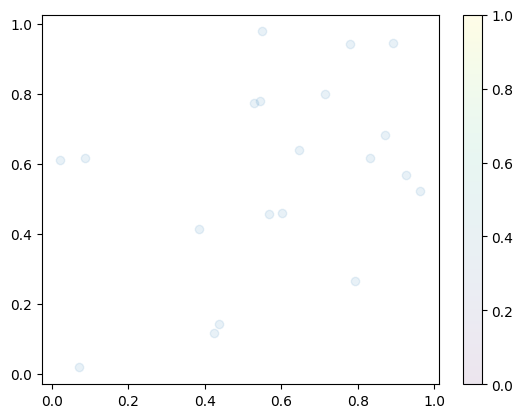

In [52]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n = 20
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y, alpha=0.1, cmap='Spectral') ## alpha? cmap?
plt.colorbar()
plt.show()

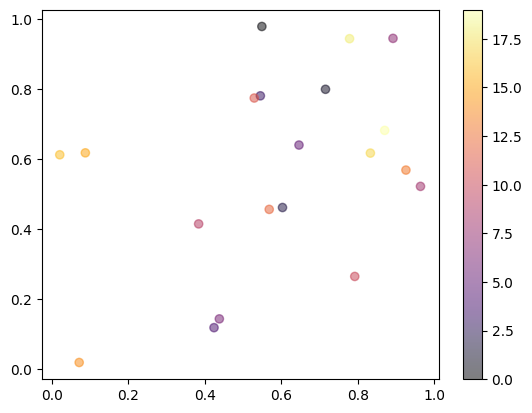

In [53]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n = 20
x = np.random.rand(n)
y = np.random.rand(n)

plt.scatter(x, y, c=np.arange(n),alpha=0.5, cmap='inferno') ## alpha? cmap?
plt.colorbar()
plt.show()

### Question 3. Matplotlib
##### (1) What is alpha and cmap above? Google it and write the answer.
##### (2) Write and execute a code that has alpha=0.1. Can you see the difference?
##### (3) Check the type of cmap and run the code that changed the type of cmap.

In [ ]:
# (1)답
# alpha는 마커의 투명도다 cmap은 파라미터에 컬러맵에 데이터 값을 색상을로 매핑함
# (2)답
# alpha를 0.1로 설정해주면, alpha가 0.5일 때보다 마커가 더 흐림
# (3)답
# cmap을 inferno로 변경해주면 색이 빨간색으로 변함

## Notice
### Lecture 4-8 also covers backpropagation and vanishing gradient descent problem
### But we'll stop here this week! HAPPY NEW YEAR :)

### The End.

##### Please upload your Colab file @Github https://github.com/duneag2/intro-dl/tree/main/Assignment2

*   First, make your folder by your name (e.g. seungeun)
*   Then upload your "Jupyter Notebook" file under that directory
*   코드 실행 결과 전체를 담은 파일을 업로드 해주세요!

###### Need Help?



*   Please refer to this link https://yeko90.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-colab%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C-%EC%95%95%EC%B6%95%ED%8C%8C%EC%9D%BC-%ED%92%80%EA%B8%B0 OR
*   Just save your Jupyter Notebook (.ipynb) file in here (colab) and upload via 'Add file' - 'Upload files' https://nthree.tistory.com/60